In [ ]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array

In [ ]:
folder = '/content/drive/MyDrive/Colab Notebooks/hinhHoa/'
photos, labels = list(), list()
for file in listdir(folder):
  output= 0.0
  if file.startswith('ROSE'):
    output= 1.0
  if file.startswith('lotus'):
    output= 2.0
  if file.startswith('DAISY'):
    output= 3.0
  if file.startswith('TULIP'):
    output= 4.0
  if file.startswith('SUNFLOWER'):
    output= 5.0
  if file.startswith('APRICOT'):
    output= 6.0
  photo = load_img(folder + file, target_size= (30,40))
  photo= img_to_array(photo)

  photos.append(photo)
  labels.append(output)

In [ ]:
photos= asarray(photos)
labels= asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/Colab Notebooks/Nhan_dien_hoa1.npy', photos)
save('/content/drive/MyDrive/Colab Notebooks/Nhan_dien_hoa2.npy', labels)

(3985, 30, 40, 3) (3985,)


In [ ]:
# Split data into train & test
split_index = int(0.05 * len(photos))
test_x, test_y = photos[:split_index], labels[:split_index]
train_x, train_y = photos[split_index:], labels[split_index:]

In [ ]:
print(test_x.shape, train_x.shape)

(199, 30, 40, 3) (3786, 30, 40, 3)


In [ ]:
train_x = train_x.reshape((3786, 30, 40, 3))
train_x = train_x.astype('float32')/255

test_x = test_x.reshape((199, 30, 40, 3))
test_x = test_x.astype('float32')/255

In [ ]:
from keras.utils import to_categorical
train_y = to_categorical(train_y,7)
test_y = to_categorical(test_y,7)

In [ ]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input
from keras.optimizers import Adam
from keras import losses
loss = losses
batch_size = 73
epochs = 40
classes = 7

In [ ]:
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape = (30, 40, 3), padding= 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(256, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(512, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(1024, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [ ]:
from keras.losses import categorical_crossentropy
model.add(Flatten())
model.add(Dense(1024, activation = 'linear'))

model.add(Dense(classes, activation = 'softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 30, 40, 32)        896       
                                                                 
 leaky_re_lu_59 (LeakyReLU)  (None, 30, 40, 32)        0         
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 15, 20, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 15, 20, 64)        18496     
                                                                 
 conv2d_54 (Conv2D)          (None, 15, 20, 64)        36928     
                                                                 
 leaky_re_lu_60 (LeakyReLU)  (None, 15, 20, 64)        0         
                                                     

In [ ]:
#Compile:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
train = model.fit(train_x, train_y, batch_size= batch_size, epochs= epochs, verbose= 1)

Epoch 1/40
52/52 [==============================] - 143s 3s/step - loss: 1.6338 - accuracy: 0.2982
Epoch 2/40
52/52 [==============================] - 141s 3s/step - loss: 1.2517 - accuracy: 0.4635
Epoch 3/40
52/52 [==============================] - 140s 3s/step - loss: 1.0859 - accuracy: 0.5671
Epoch 4/40
52/52 [==============================] - 142s 3s/step - loss: 0.9368 - accuracy: 0.6297
Epoch 5/40
52/52 [==============================] - 139s 3s/step - loss: 0.8525 - accuracy: 0.6659
Epoch 6/40
52/52 [==============================] - 142s 3s/step - loss: 0.6902 - accuracy: 0.7319
Epoch 7/40
52/52 [==============================] - 143s 3s/step - loss: 0.5475 - accuracy: 0.7934
Epoch 8/40
52/52 [==============================] - 140s 3s/step - loss: 0.4277 - accuracy: 0.8368
Epoch 9/40
52/52 [==============================] - 144s 3s/step - loss: 0.3939 - accuracy: 0.8550
Epoch 10/40
52/52 [==============================] - 142s 3s/step - loss: 0.3047 - accuracy: 0.8928
Epoch 11/

In [ ]:
test_loss, test_acc = model.evaluate(test_x, test_y)
print('Test accuracy:', test_acc)

7/7 [==============================] - 1s 46ms/step - loss: 1.3006 - accuracy: 0.7940
Test accuracy: 0.7939698696136475


1/1 [==============================] - 0s 112ms/step
TULIP


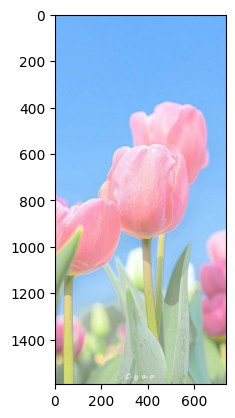

1/1 [==============================] - 0s 22ms/step
lotus


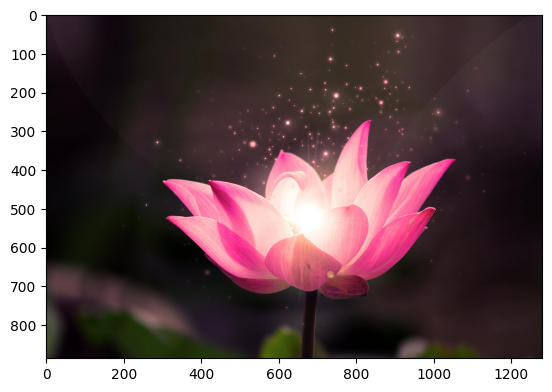

1/1 [==============================] - 0s 26ms/step
SUNFLOWER


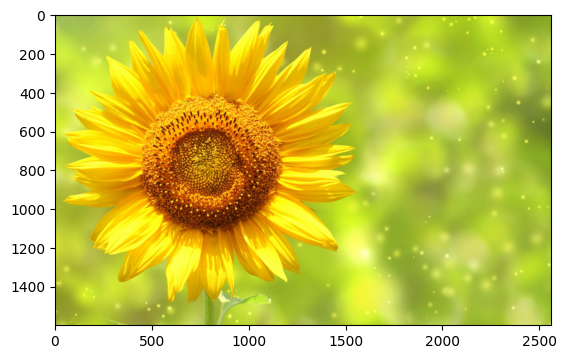

1/1 [==============================] - 0s 26ms/step
APRICOT


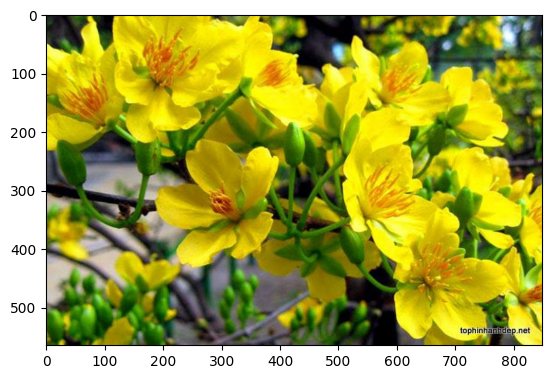

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
folder = '/content/drive/MyDrive/Colab Notebooks/HoaTest/'
for file in listdir(folder):
  photo = load_img(folder  +  file)
  plt.imshow(photo)
  
  photo = load_img(folder +   file, target_size = (30, 40))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  class_name=['','ROSE', 'lotus', 'DAISY', 'TULIP', 'SUNFLOWER', 'APRICOT']
  print(class_name[result])
  plt.show()